In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import shap  
from flask import Flask, render_template, request
import joblib

In [2]:
df = pd.read_excel("C:/Users/himas/Downloads/dataset (1) (2).xlsx")

In [3]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [4]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000


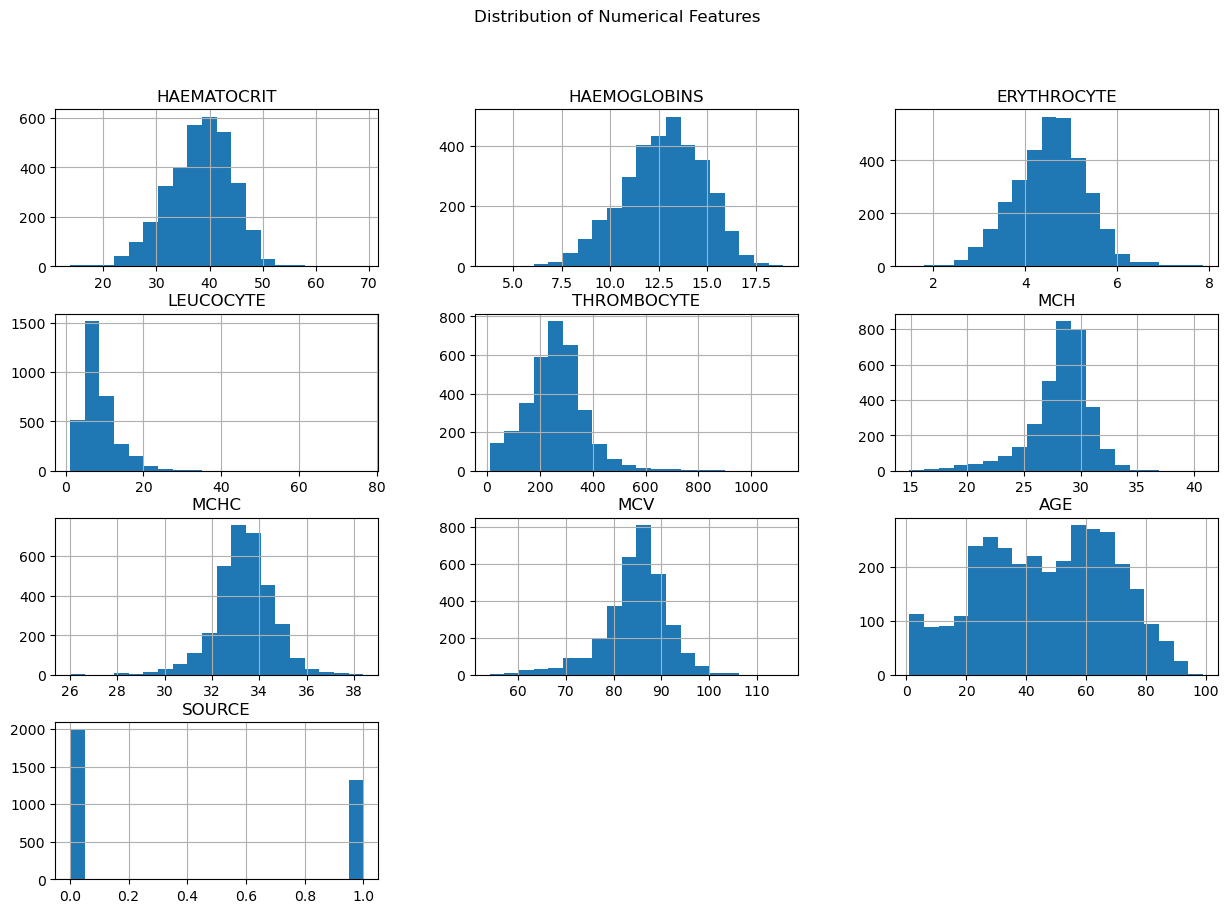

In [5]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

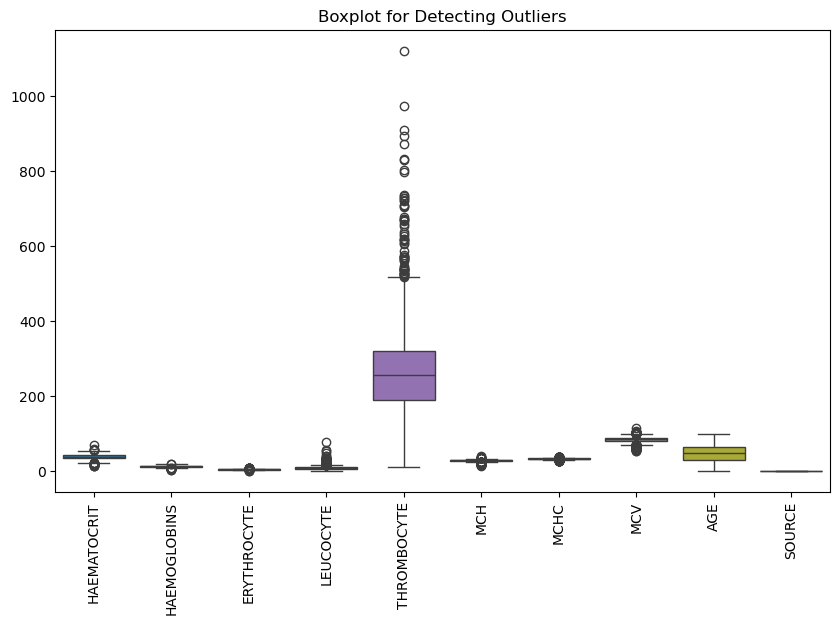

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot for Detecting Outliers')
plt.xticks(rotation=90)
plt.show()

In [27]:
le = LabelEncoder()
df['SOURCE'] = le.fit_transform(df['SOURCE'])

In [9]:
X = df.drop(columns=['SOURCE'])
y = df['SOURCE']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier()
}

In [13]:
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    model_results[model_name] = {
        'Accuracy': accuracy,
        'AUC': auc,
        'Classification Report': classification_report(y_test, y_pred)
    }

In [14]:
model_results

{'Logistic Regression': {'Accuracy': 0.6993957703927492,
  'AUC': 0.7430555555555556,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.69      0.88      0.78       392\n           1       0.72      0.44      0.54       270\n\n    accuracy                           0.70       662\n   macro avg       0.70      0.66      0.66       662\nweighted avg       0.70      0.70      0.68       662\n'},
 'Random Forest': {'Accuracy': 0.7371601208459214,
  'AUC': 0.7823507180650038,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.74      0.86      0.79       392\n           1       0.73      0.56      0.63       270\n\n    accuracy                           0.74       662\n   macro avg       0.74      0.71      0.71       662\nweighted avg       0.74      0.74      0.73       662\n'},
 'SVM': {'Accuracy': 0.7371601208459214,
  'AUC': 0.7848167044595616,
  'Classification Report': '    

In [15]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

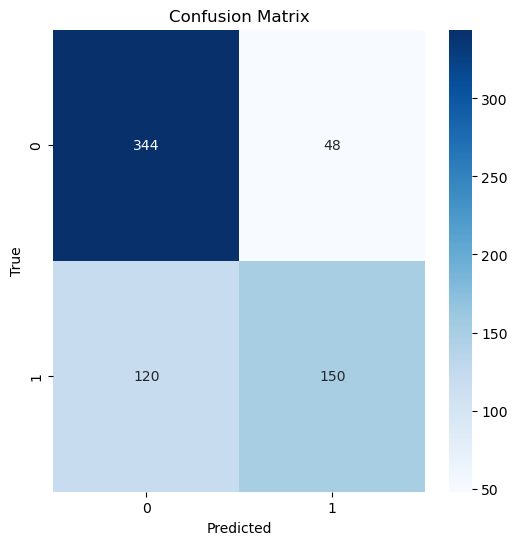

In [28]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

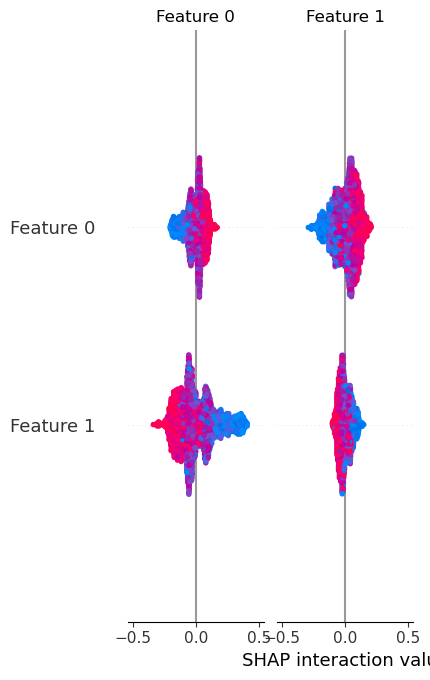

In [30]:
shap.summary_plot(shap_values, X_train)

In [31]:
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [32]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [33]:
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']